In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use("fivethirtyeight")
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
print cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [5]:
print cancer["feature_names"]

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print "Number of features:", len(cancer["feature_names"])

Number of features: 30


In [17]:
data = np.column_stack((cancer["data"], cancer["target"]))
cols = np.concatenate((cancer["feature_names"], ["target"]))
df = pd.DataFrame(data, columns=cols, index=np.arange(0, 569, 1))
df.shape

(569, 31)

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [23]:
classDist = df.target.value_counts()
classDist.index = ["malignant", "benign"]
print classDist

malignant    357
benign       212
Name: target, dtype: int64


In [24]:
X = df[cancer["feature_names"]]
y = df["target"]
print X.shape, y.shape

(569, 30) (569L,)


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
print xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(426, 30) (143, 30) (426L,) (143L,)


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
means = df.mean()[:-1].values.reshape(1, -1)
knn.predict(means)

array([ 1.])

In [31]:
testPreds = knn.predict(xtest)
print "Accuracy on test set:", np.mean(testPreds == ytest)

Accuracy on test set: 0.916083916084


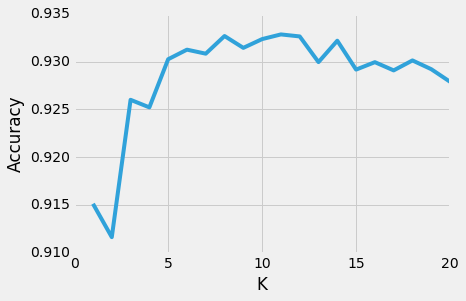

In [35]:
Ks = np.arange(1, 21, 1)
mean_scores = []
for K in Ks:
    scores = []
    for t in xrange(1000):
        xtrain, xtest, ytrain, ytest = train_test_split(X, y)
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(xtrain, ytrain)
        scores.append(np.mean(knn.predict(xtest) == ytest))
    mean_scores.append(np.mean(scores))
plt.plot(Ks, mean_scores);
plt.xlabel("K");
plt.ylabel("Accuracy");

Scale data matrix X such that each feature has mean 0.0 and standard deviation 1.0. In the original dataset the 30 different features are on very different scales with some features always close to 0 and some consistently over 1000 in value.

In [37]:
Xscale = (X - X.mean())/X.std()

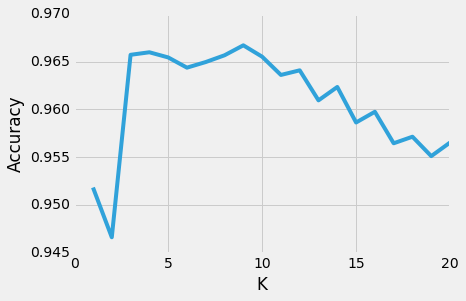

In [38]:
Ks = np.arange(1, 21, 1)
mean_scores = []
for K in Ks:
    scores = []
    for t in xrange(1000):
        xtrain, xtest, ytrain, ytest = train_test_split(Xscale, y)
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(xtrain, ytrain)
        scores.append(np.mean(knn.predict(xtest) == ytest))
    mean_scores.append(np.mean(scores))
plt.plot(Ks, mean_scores);
plt.xlabel("K");
plt.ylabel("Accuracy");

Averaged over 1000 different randomized training/test dataset splits, the KNN classifier performs better after the data has been scaled. The lowest accuracy for any K in the range from K = 1 to K = 20 performs better with the scaled data than the previous best performing K with the unscaled data.

Make a plot to visualize the different prediction scores between training and test sets split by malignant vs. benign cells.

In [39]:
malig_train_scores= []
malig_test_scores = []
ben_train_scores = []
ben_test_scores = []
for t in xrange(100):
    X_train, X_test, y_train, y_test = train_test_split(Xscale, y)
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, y_train)
    
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]
    
    malig_train_scores.append(knn.score(mal_train_X, mal_train_y))
    malig_test_scores.append(knn.score(mal_test_X, mal_test_y))
    ben_train_scores.append(knn.score(ben_test_X, ben_test_y))
    ben_test_scores.append(knn.score(ben_train_X, ben_train_y))

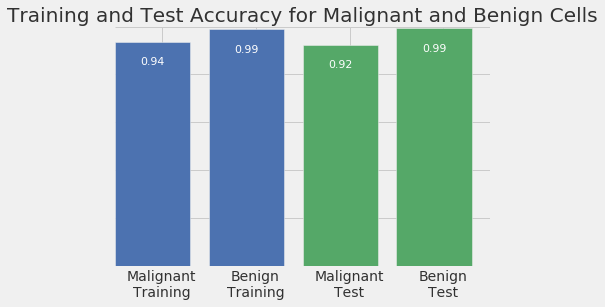

In [45]:
avg_scores = [np.mean(malig_train_scores), np.mean(ben_train_scores), np.mean(malig_test_scores), np.mean(ben_test_scores)]
bars = plt.bar(np.arange(4), avg_scores, color=['#4c72b0','#4c72b0','#55a868','#55a868']);

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*0.90, "{0:.{1}f}".format(height, 2), 
                  ha = "center", color="w", fontsize = 11);

plt.tick_params(top="off", bottom="off", left="off", right="off", labelleft="off", labelbottom="on");

for spine in plt.gca().spines.values():
    spine.set_visible(False);

plt.xticks([0.5, 1.5, 2.5, 3.5], ["Malignant\nTraining", "Benign\nTraining", "Malignant\nTest", "Benign\nTest"], alpha=0.8);
plt.title("Training and Test Accuracy for Malignant and Benign Cells", alpha=0.8);